In [1]:
import os.path as osp
import os
import cv2
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
from typing import *

from utils import *

In [2]:
id="P0190_0006"

In [3]:
gt=get_gt(id)

In [4]:
bboxes=[]
for i in gt:
    bboxes.append(i["bbox"])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


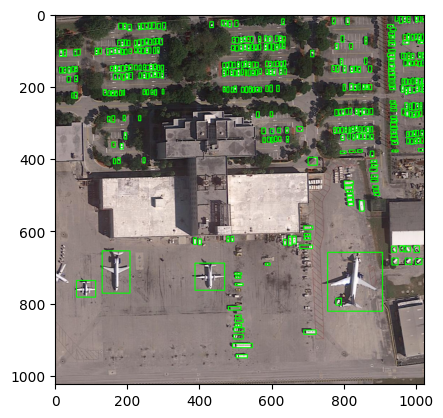

In [5]:
# 使用cv2库可视化bbox
# 绘制边界框
visualize_bbox(data_path(id),bboxes)
# 事实证明，bbox的格式是x1,y1,x2,y2

In [6]:
seg=get_seg(id)

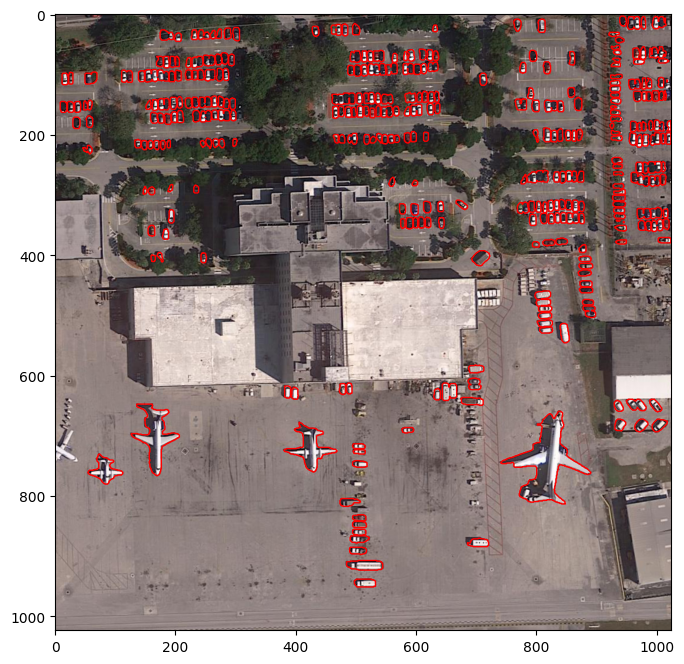

In [7]:
visualize_segmentation(data_path(id),seg)

In [8]:
# id="P0032_0002"
id="P0190_0006"
gt_lis=get_gt(id)
seg_lis=get_seg(id)
seg_box_lis=[seg2box(seg) for seg in seg_lis]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


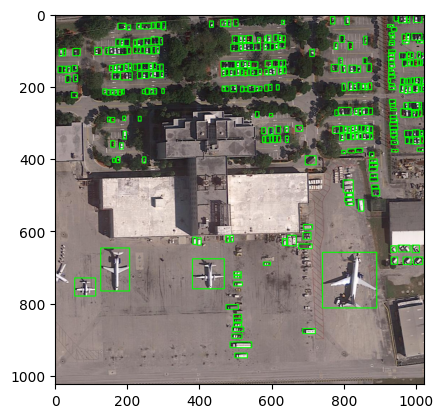

In [9]:
visualize_bbox(data_path(id),seg_box_lis)

In [15]:
seg_label_lis=[]
for gt in gt_lis:
    info={}
    # 找一个对应的seg
    gt_box=gt["bbox"]
    gt_seg_iou=0
    seg_for_gt=None
    for seg,seg_box in zip(seg_lis,seg_box_lis):
        iou=calculate_iou(gt_box,seg_box)
        if gt_seg_iou<iou:
            gt_seg_iou=iou
            seg_for_gt=seg
    if seg_for_gt==None:
        print(gt_box)
    info["category"]=gt["category"]
    info["bbox"]=gt_box
    info["segmentation"]=seg_for_gt
    seg_label_lis.append(info)


In [11]:
filter_seg_lis=[]

for ann in seg_label_lis:
    filter_seg_lis.append(ann["segmentation"])

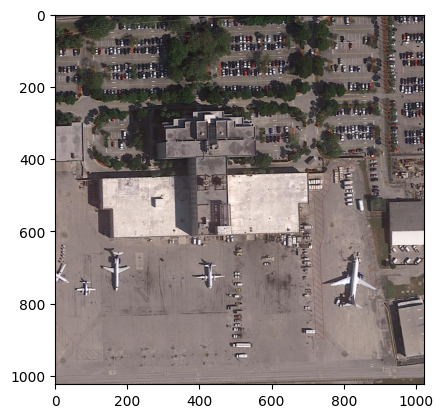

In [13]:
img=plt.imread(data_path(id))
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


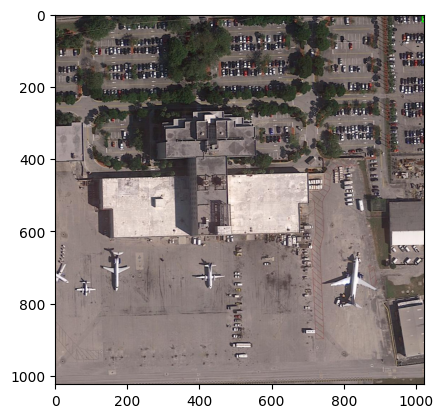

In [14]:
visualize_bbox(data_path(id),[1016.0, 3.0, 1022.0, 21.0])


TypeError: 'NoneType' object is not subscriptable

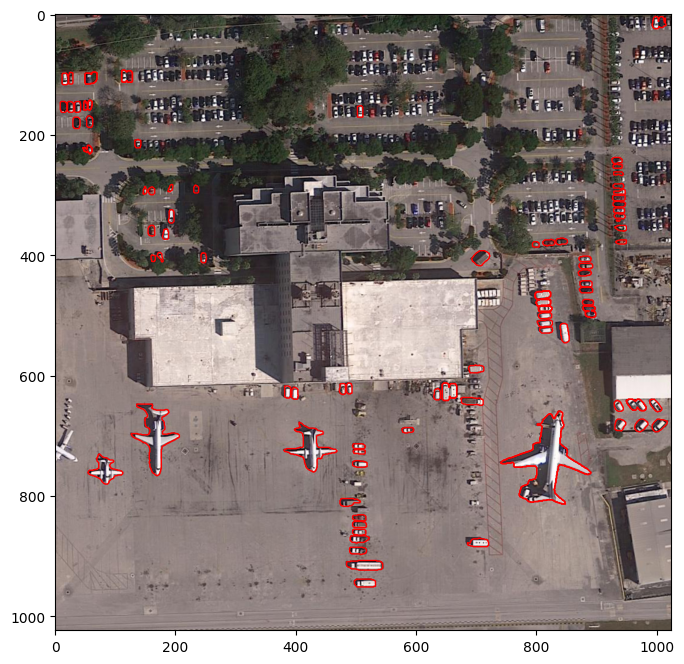

In [ ]:
visualize_segmentation(data_path(id),filter_seg_lis)
